In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [38]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

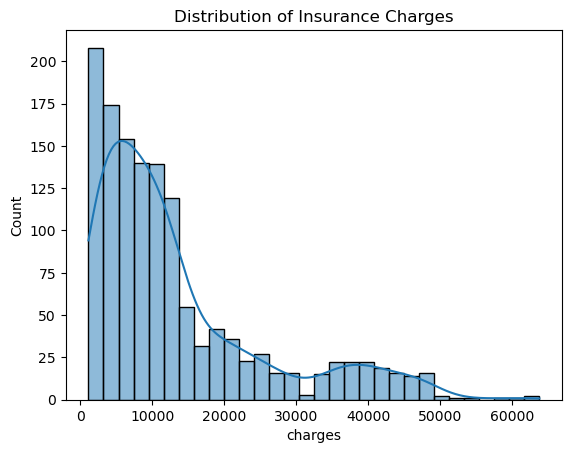

In [40]:
plt.figure()
sns.histplot(data['charges'], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()

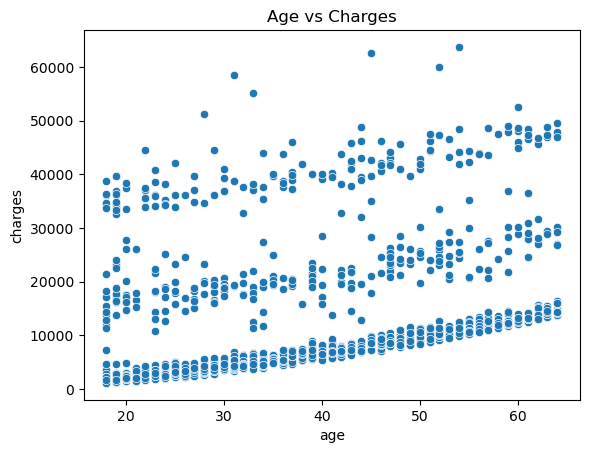

In [41]:
plt.figure()
sns.scatterplot(x=data['age'], y=data['charges'])
plt.title("Age vs Charges")
plt.show()

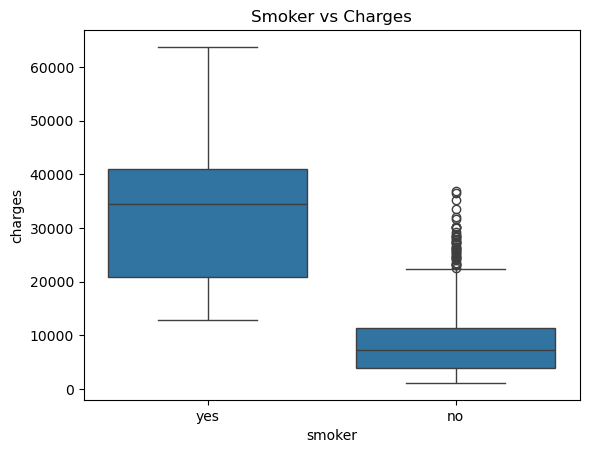

In [42]:
plt.figure()
sns.boxplot(x=data['smoker'], y=data['charges'])
plt.title("Smoker vs Charges")
plt.show()

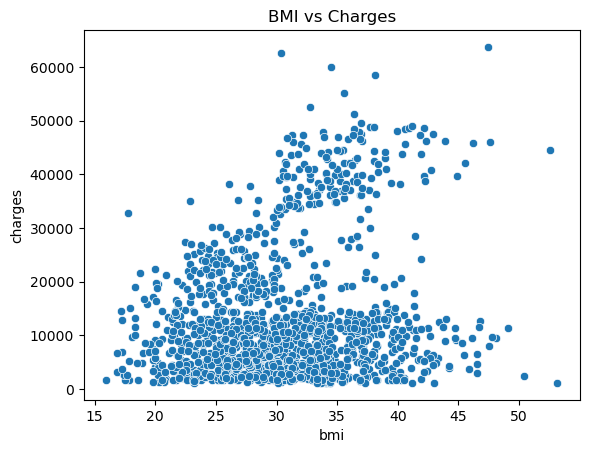

In [43]:
plt.figure()
sns.scatterplot(x=data['bmi'], y=data['charges'])
plt.title("BMI vs Charges")
plt.show()

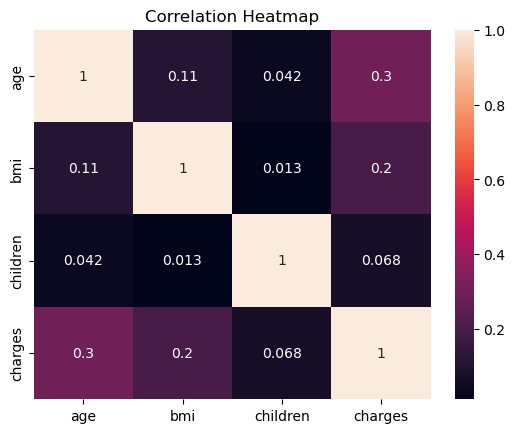

In [44]:
plt.figure()
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [45]:
pivot_gender = pd.pivot_table(
    data,
    values='charges',
    index='sex',
    aggfunc='mean'
)

pivot_gender

,charges
sex,
female,12569.578844
male,13956.751178


In [46]:
pivot_smoker = pd.pivot_table(
    data,
    values='charges',
    index='smoker',
    aggfunc='mean'
)

pivot_smoker

,charges
smoker,
no,8434.268298
yes,32050.231832


In [47]:
pivot_region = pd.pivot_table(
    data,
    values='charges',
    index='region',
    aggfunc='mean'
)

pivot_region

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


In [48]:
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
le_region = LabelEncoder()

data['sex'] = le_sex.fit_transform(data['sex'])
data['smoker'] = le_smoker.fit_transform(data['smoker'])
data['region'] = le_region.fit_transform(data['region'])

In [49]:
X = data.drop("charges", axis=1)
y = data["charges"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [51]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
y_pred = rf.predict(X_test)

In [53]:
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.8600127872707377


In [54]:
pickle.dump(rf, open("insurance_model.pkl", "wb"))
pickle.dump(le_sex, open("le_sex.pkl", "wb"))
pickle.dump(le_smoker, open("le_smoker.pkl", "wb"))
pickle.dump(le_region, open("le_region.pkl", "wb"))

print("Model Saved Successfully ✅")

Model Saved Successfully ✅
